In [48]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import keras

In [2]:
#load data
df = pd.read_csv('dialog_acts.dat',sep=',',names=['data'])
df[['data']] = df['data'].apply(lambda x: pd.Series(x.lower()))
df[['label','utterance']] = df['data'].apply(lambda x: pd.Series(x.split(' ', 1)))

In [3]:
#save labeles and utterances
y = df['label']
x = df['utterance']
print(len(y))
#remove duplicates
df = df.drop_duplicates(subset=['label','utterance'])
#save cleaned data
y_clean = df['label']
x_clean = df['utterance']

len(y_clean)

25501


5359

In [4]:
#split data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=10)
x_clean_train,x_clean_test,y_clean_train,y_clean_test = train_test_split(x_clean,y_clean,test_size=0.15,random_state=10)

In [5]:
#define first baseline prediction methode
def majority_baseline(utterance):
    return 'inform'


In [6]:
#define 2nd baseline prediction method(using rules)

# The order of the rules plays a big role in the accuracy
# I tried to put the class labels first that appear the most times in the dataset. (Hence is makes sense to have inform as first rule)
rules = {
    # I put thank you first because in the text whenever theres thank you and bye at the same sentence
    # it will always be thankyou
    'inform': ['any', 'im looking'],
    'request': ['phone', 'address', 'postcode', 'post code', 'type of food', 'what', 'whats'],
    'thankyou': ['thank you'],
    'ack': ['okay','ok'],
    'affirm': ['yes', 'right', 'yeah'],
    'bye': ['good bye','bye'],
    'deny': ['wrong','not', 'dont'],
    'hello': ['hello', 'hi'],
    'negate': ['no'],
    'repeat': ['repeat', 'again', 'back'],
    'reqalts': ['is there', 'how about', 'anything else', 'what about'],
    'confirm': ['is it', 'does it'],
    'reqmore': ['more'],
    'restart': ['reset', 'start over', 'start again'],
    'null': ['cough', 'unintelligible', 'tv_noise', 'noise', 'sil', 'none']
}

def rules_baseline(utterance):

    for potential_class in rules.keys():
        for key_word in rules[potential_class]:
            if key_word in utterance:
                return potential_class
    return 'inform'

In [7]:
#calc bags of words
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(x)
x_train_bow = vectorizer.transform(x_train)
x_test_bow = vectorizer.transform(x_test)

x_train_clean_bow = vectorizer.transform(x_clean_train)
x_test_clean_bow = vectorizer.transform(x_clean_test)


Accuracy DTC with duplicates:  0.9785676947203346


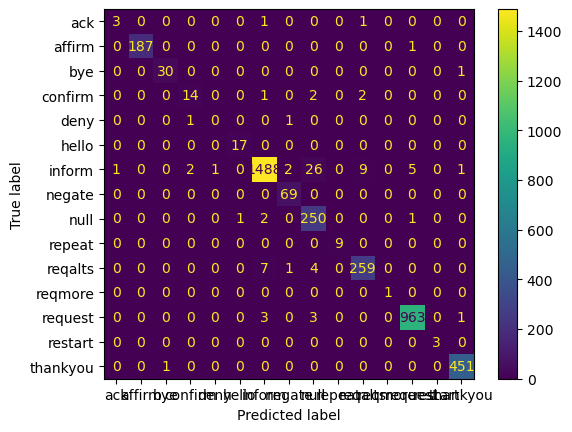

Accuracy DTC without duplicates: 0.8818407960199005


ValueError: Found input variables with inconsistent numbers of samples: [3826, 804]

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

#define prediction method for Decision Trees
clf = DecisionTreeClassifier()
clf.fit(x_train_bow,y_train)

y_pred = clf.predict(x_test_bow)
print('Accuracy DTC with duplicates: ',accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()

clf_clean = DecisionTreeClassifier()
clf_clean.fit(x_train_clean_bow,y_clean_train)
y_pred = clf_clean.predict(x_test_clean_bow)
print('Accuracy DTC without duplicates: ' + str(accuracy_score(y_clean_test, y_pred)))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)

def tree_prediction(utterance):
    bow = vectorizer.transform(utterance)
    return clf.predict(bow)

def tree_clean_prediction(utterance):
    bow = vectorizer.transform(utterance)
    return clf_clean.predict(bow)

In [9]:
#define prediction method for Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train_bow,y_train)

y_pred = log_reg.predict(x_test_bow)
print('Accuracy LR with duplicates: ',accuracy_score(y_test, y_pred))

log_reg_clean = LogisticRegression()
log_reg_clean.fit(x_train_clean_bow,y_clean_train)
y_pred = log_reg_clean.predict(x_test_clean_bow)
print('Accuracy LR without duplicates: ' + str(accuracy_score(y_clean_test, y_pred)))


def lr_prediction(utterance):
    bow = vectorizer.transform(utterance)
    return log_reg.predict(bow)

def lr_clean_prediction(utterance):
    bow = vectorizer.transform(utterance)
    return log_reg_clean.predict(bow)

C:\Users\linus\anaconda3\envs\MairC\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy LR with duplicates:  0.9756926293779404
Accuracy LR without duplicates: 0.8967661691542289


In [36]:
pred_correctly = [x for x in y_test if x == 'inform']
print('Accuracy Majority Baseline Model', len(pred_correctly)/len(y_test))

counter_correct = 0

for index in x_test.index:
    if rules_baseline(x_test[index]) == y_test[index]:
        counter_correct += 1
print('Accuracy rule-based Baseline Model', counter_correct/len(y_test))

Accuracy Majority Baseline Model 0.4012023000522739
Accuracy rule-based Baseline Model 0.8092002090956613


5359

In [32]:
for x in x_test.index:
    print(x)
    break

18162


In [35]:
y_test[18162]

'affirm'

In [43]:
tree_prediction(['hi'])[0]

'hello'